# Статистический анализ данных

В данном проекте будут выполняться следующие задачи:

1. загрузка данных
2. выполняем предобработку данных:

  приведение данных к нормальному типу данных
  проверка наличие пропусков и дублей, обработка аномалий
  добавим стобец с номером месяца
3. проведем исследовательский анализ:
    - частота встречаемости городов
    - соотношение пользователей с подпиской и без подписки
    - возраст пользователей
    - расстояние, которое пользователь преодолел за одну поездку
    - продолжительность поездок
    
4. объединение 3х таблиц в единый датасет
  создание двух допольнительных таблиц (поездки с подпиской и без)

5. Подсчёт выручки
    - Создание Датафрема с агрегированными данными суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - Добавим столбец с общей прибилью с каждого клиента.
6. Проверка гипотез
    - Расчет гипотезы тратят ли пользователи с подпиской больше времени на поездки.
    - Расчет гипотезы попадания среднего диапазона данных в нужный коридор (до 3130)
    - Проверки гипотезы: была ли средняя выручка от пользователей с подпиской больше чем польлзователей без подписки.
    - Размышления о ситиации с обновлением сервера и кол-вом обращений
  7.  Распределения
    - Какое количество промокодов нужно разослать чтобы сохранилось условие
    - Найти вероятность того что сколько % откроют уведомление
    

---
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.



---

- Мы располагаем таблицами, которые хранятся по адресам:
  users_go.csv -  пользователи
  rides_go.csv -  поездки
  subscriptions_go.csv - подписки

- Каждая таблица хранит в себе:
  users_go.csv:
     - user_id - уникальный идентификатор пользователя
     - name - имя пользователя
     - age - возраст
     - city - тип подписки (free, ultra)
     - subscription_type - тип подписки (free, ultra)
  rides_go.csv:
     - user_id - уникальный идентификатор пользователя
     - distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
     - duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
     - date - дата совершения поездки
  subscriptions_go.csv:
     - subscription_type - тип подписки
     - minute_price - стоимость одной минуты поездки по данной подписке
     - start_ride_price - стоимость начала поездки
     - subscription_fee - стоимость ежемесячного платежа





In [82]:
# импортируем библиотеки которыми будем пользоваться
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Шаг. Загрузка данных

Загружаем данные и смотрим с чем предстоит работать.

Данные сохраняем в следующие переменные чтобы не запутаться

rd_df - Поездки — rides_go.csv

sub_df - Подписки — subscriptions_go.csv

user_df - Пользователи — users_go.csv

In [84]:
# считываем данные и записываем в переменную
try:
    rd_df = pd.read_csv('/datasets/rides_go.csv' , sep  = ',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/5_project/rides_go.csv'
    rd_df = pd.read_csv(pathik, sep  = ',')
rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [85]:
rd_df.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [86]:
# считываем данные и записываем в переменную

try:
    sub_df = pd.read_csv('/datasets/subscriptions_go.csv' , sep  = ',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/5_project/subscriptions_go.csv'
    sub_df = pd.read_csv(pathik, sep  = ',')
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [87]:
sub_df.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [88]:
# считываем данные и записываем в переменную

try:
    user_df = pd.read_csv('/datasets/users_go.csv' , sep  = ',')
except:
    pathik = '/content/drive/MyDrive/colab практикум/5_project/users_go.csv'
    user_df = pd.read_csv(pathik, sep  = ',')
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [89]:
user_df.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Вывод. данные успешно импортированы с нужными разделителями. и записаны в соответствующие переменные

## Шаг. Предобработка данных

### Проверяем корректость заполнености заваний столбов, на предмет наличия лишних пропусков

In [90]:
rd_df.columns

Index(['user_id', 'distance', 'duration', 'date'], dtype='object')

In [91]:
sub_df.columns

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [92]:
user_df.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

Как мы видим лишний пробелов в названиях столбов нету, значит обращаться можно просто по названию

### Проверим наличие пропусков в данных и наличие дубликатов

In [93]:
rd_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [94]:
sub_df.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [95]:
user_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Как мы видим пропусков в данных датасетах нет. значит заполнять не нужно

In [96]:
rd_df.duplicated().sum()

0

In [97]:
sub_df.duplicated().sum()

0

In [98]:
sub_df.duplicated().sum()

0

Очевидных дубликатов так же нету, но стоит проверить категорийные столбцы

Проверим наличие дубликатов в столбце с айдишиками

In [99]:
user_df[user_df.duplicated(subset=['user_id','name','age','city','subscription_type'], keep=False)].head(15)

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
120,121,Алина,25,Пятигорск,ultra
126,127,Павел,25,Пятигорск,ultra
135,136,Марсель,25,Тюмень,ultra
152,153,Герман,23,Москва,ultra
203,204,Руслан,30,Пятигорск,ultra


In [100]:
#  в выводе кода выше видно что есть дубли, но они идкт не порядку, глазами не проверить
# сохраним случайные 5  чтобы было наглядно
k = user_df[user_df.duplicated(subset=['user_id','name','age','city','subscription_type'], keep=False)]
k = k['user_id'].sample(5)

user_df.query('user_id  in @k')

,user_id,name,age,city,subscription_type
46,47,Юрий,28,Тюмень,ultra
120,121,Алина,25,Пятигорск,ultra
208,209,Андрей,23,Омск,ultra
402,403,Полина,19,Сочи,ultra
1044,1045,Артемий,28,Ростов-на-Дону,free
1537,403,Полина,19,Сочи,ultra
1553,121,Алина,25,Пятигорск,ultra
1559,209,Андрей,23,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


In [101]:
# сделаем контроль размером и отчистим от дубликатов, они составляют ровно половину длины дубликатов

print(f'Длина изначальньного датасета =  ',len(user_df))
print(f'Длина дубликатов  = ', len(user_df[user_df.duplicated(subset=['user_id','name','age','city','subscription_type'], keep=False)]))

user_df = user_df.drop_duplicates(subset=['user_id'])
print(f'Длина отчищенного датасета от дублей в айдишниках =  ',len(user_df))

Длина изначальньного датасета =   1565
Длина дубликатов  =  62
Длина отчищенного датасета от дублей в айдишниках =   1534


отчистили данные от дублей, для того чтобы корректно получилось соеденить таблицы. и там не возникло неожиданный дублей

#### Проверим формат записи данных в таблице с пользователями в столбце subscription_type

In [102]:
user_df['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Аномалий нету, можно будет спокойно сделать соединение таблиц

### Проверим типы данных, переведенм их в верный тип данных. Далее соеденим данные в одну таблицу

In [103]:
rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [104]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [105]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [106]:
# переводим тип данных в столбце с датой в верный тип

rd_df['date'] = pd.to_datetime(rd_df['date'])

rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [107]:
# переведем тип данных Имя и Город в верный тип данных

user_df['name'] = user_df['name'].astype('string')
user_df['city'] = user_df['city'].astype('string')

user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   string
 2   age                1534 non-null   int64 
 3   city               1534 non-null   string
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(1), string(2)
memory usage: 71.9+ KB


In [108]:
#  Проверим поле названия города на наличие аномалий регистра и пробелов

user_df['city'].unique()

<StringArray>
[        'Тюмень',           'Омск',         'Москва', 'Ростов-на-Дону',
      'Краснодар',      'Пятигорск',   'Екатеринбург',           'Сочи']
Length: 8, dtype: string

In [109]:
# округлим значения в стобце растояние и длительность сесии до 2х знаков после запятой

rd_df['distance'] = rd_df['distance'].round(2)
rd_df['duration'] = rd_df['duration'].round(2)
rd_df.sample(5)

,user_id,distance,duration,date
16791,1442,2430.07,9.67,2021-06-21
10348,982,3700.94,25.10,2021-07-20
17652,1506,1469.22,14.19,2021-10-13
11994,1101,2146.04,18.90,2021-01-22
2948,316,831.71,7.16,2021-01-30


Создаем новый столбец с номером месяца на основе столбца date. в таблице о поездках


In [110]:
rd_df['moth_num'] = rd_df['date'].dt.month
rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   moth_num  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


далее проверям то что все данные имеют нормальный тип данных  и соеденяем таблицы

In [111]:
rd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   moth_num  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [112]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [113]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   string
 2   age                1534 non-null   int64 
 3   city               1534 non-null   string
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(1), string(2)
memory usage: 71.9+ KB


Вывод: на этом шаге были приведены столбцы в верный тип данных. проверили наличие пропусков в данных и наличие дубликатов. Избавились от дубликатов в столбце с айдишниками в таблице пользователи. Добавлен столбец с номером месяца. Округлили столбцы растояние и длительность поездки до двух знаков после запятой. данные подготовлены для дальнейшей работы с ними.

## Шаг. Исследовательский анализ данных

###  частота встречаемости городов

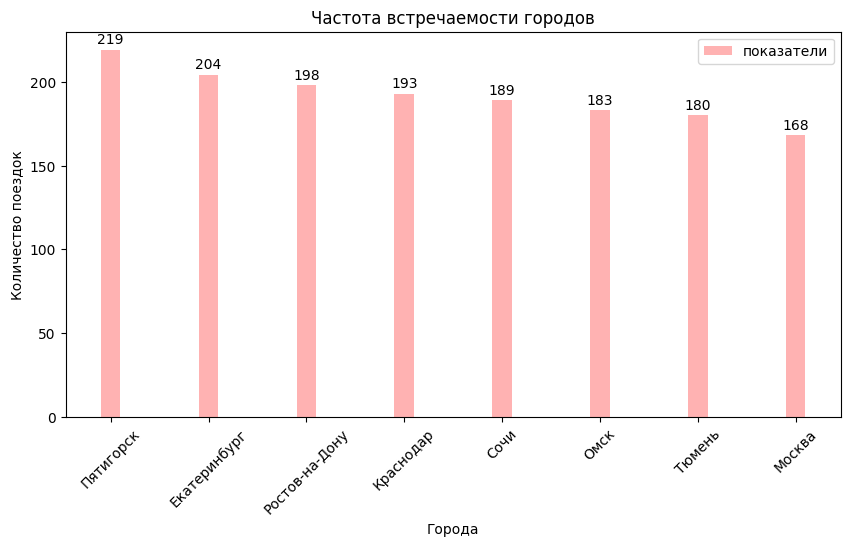

In [114]:
count_city = user_df['city'].value_counts().reset_index()
count_city.columns = ['city', 'values']

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(count_city["city"], count_city["values"], width=0.2,  color= 'red',  alpha =  0.3)


ax.set_xticklabels(count_city['city'].unique(), rotation=45)

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, count_city['values'], height_factor=1.01)

plt.legend (('показатели',))
plt.title('Частота встречаемости городов')
plt.ylabel("Количество поездок")
ax.set_xlabel("Города")

plt.show()

In [115]:
# сделать вероятноть случйной встречи
count_city['probability'] =  count_city['values'] / count_city['values'].sum()
for i in range(len(count_city)):
  print(count_city['city'][i] , count_city['probability'][i])

Пятигорск 0.14276401564537158
Екатеринбург 0.13298565840938723
Ростов-на-Дону 0.1290743155149935
Краснодар 0.1258148631029987
Сочи 0.12320730117340287
Омск 0.11929595827900913
Тюмень 0.11734028683181226
Москва 0.10951760104302477


In [116]:
data = count_city['values']

# Вычисление среднего значения
mean = np.mean(data)

# Вычисление отклонения каждого элемента от среднего значения
deviations = [x - mean for x in data]

# Вычисление дисперсии
variance = np.var(data)

# Вывод дисперсии
print("Дисперсия:", variance)


# Вычисление стандартного отклонения
standard_deviation = np.sqrt(variance)

# Вывод стандартного отклонения
print("Стандартное отклонение:", standard_deviation)



Дисперсия: 214.9375
Стандартное отклонение: 14.66074691139575


In [117]:


X = pd.DataFrame(count_city.index)
y = count_city['values']

model = LinearRegression()
model.fit(X, y)

trend = model.coef_[0]  #  коэффициент наклона линейной регрессии
print(trend)

-6.261904761904762


Вывод: получен коэффициент наклона линейно регрессии который равен -6.2619, данный коэф отрицальтельный, то есть каждый показатель каждого города уменьшается на приблизительно -6.3 пункта. При этом Дисперсия состаляет 214,9375 что говорит о том что данные сильно разбросаны. стандратное отклонение так же не большое из чего можно сделать вывод что в среднем от средедного данные отличаются очень сильно.

При этом шанс того что случайное значение из набора данных будет принадлежать какому либо городу распредлеяется примерно так:

    Пятигорск 0.14
    Екатеринбург 0.13
    Ростов-на-Дону 0.13
    Краснодар 0.13
    Сочи 0.12
    Омск 0.12
    Тюмень 0.12
    Москва 0.11

###  соотношение пользователей с подпиской и без подписки

In [118]:
res = user_df[user_df['subscription_type'] == 'ultra'].shape[0] / user_df[user_df['subscription_type'] == 'free'].shape[0]
print(f'Количество пользователей с подпиской  =', user_df[user_df['subscription_type'] == 'ultra'].shape[0])
print(f'Количество пользователей без подпиской  =', user_df[user_df['subscription_type'] == 'free'].shape[0])
print(f'Сотношение пользователей с подписокой на без =', res)


Количество пользователей с подпиской  = 699
Количество пользователей без подпиской  = 835
Сотношение пользователей с подписокой на без = 0.837125748502994


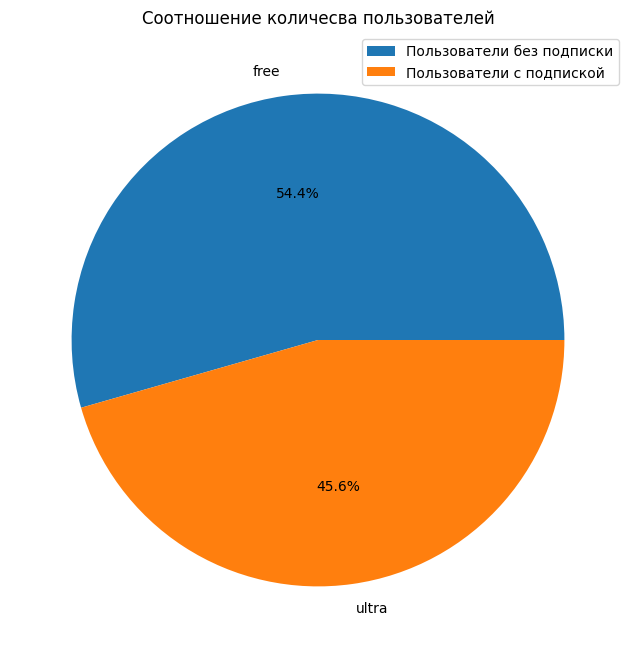

In [119]:
res1 = user_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count').reset_index()

plt.pie(res1['user_id'], labels=res1['subscription_type'], autopct='%1.1f%%')


plt.title('Соотношение количесва пользователей')

plt.gcf().set_size_inches(8, 8)
plt.legend (('Пользователи без подписки', 'Пользователи с подпиской'), loc='upper right')


plt.show()

Вывод Количество пользователей с подпиской равно 699 человек, и без 835. соотношение равно = 0.83, это означает, что на каждые 100 пользователей без подписки приходится порядка 83 пользователей с подпиской.

### возраст пользователей

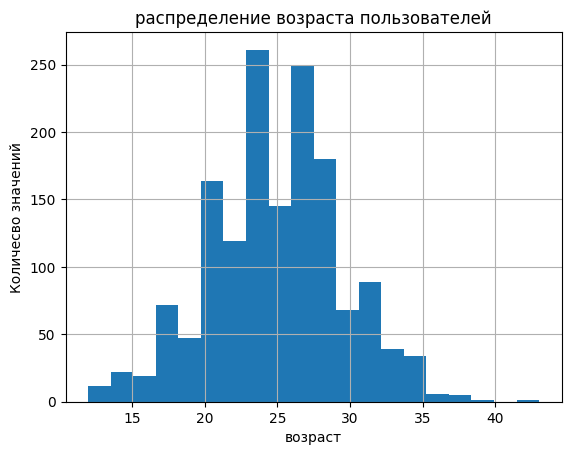

In [120]:
user_df['age'].hist(bins = 20)

plt.title('распределение возраста пользователей')
plt.xlabel('возраст')
plt.ylabel('Количесво значений')
plt.show()

на данном графике мы видим зрительно около нормальное распределение хотя есть и провалы, но проверим данное предположение Методом Шапико-Уилка

In [121]:


# Загружаем данные
data = user_df['age'].value_counts()

# Проверяем, являются ли данные нормально распределенными
result = shapiro(data)

# Выводим результаты проверки
print("Статистика Шапиро-Уилка:", result.statistic)
print("p-значение:", result.pvalue)

# Если p-значение меньше 0.05, то данные не являются нормально распределенными
if result.pvalue < 0.05:
    print("Данные не являются нормально распределенными.")
else:
    print("Данные являются нормально распределенными.")


mode = user_df['age'].mode()[0]
print(f'Мода набора данных равна {mode}')


Статистика Шапиро-Уилка: 0.8655403852462769
p-значение: 0.0016148383729159832
Данные не являются нормально распределенными.
Мода набора данных равна 25


Вывод: данные не очень хорошо соответствуют нормальному распределению и есть статистически значимая разница между распределением данных и нормальным распределением

Статистика Шапиро-Уилка чем ближе к 1 тем лучше P-значение меньше 0,05 означает, что есть статистически значимая разница между распределением данных и нормальным распределением

при этом чаще всего пользуются сервисом люди возврастом около 25 лет. далее в обе стороны снисходящая тенденция на спад

###  расстояние, которое пользователь преодолел за одну поездку

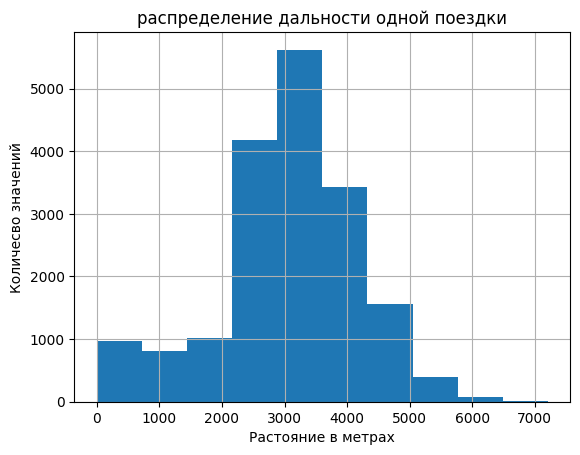

In [122]:
rd_df['distance'].hist()
plt.title('распределение дальности одной поездки')
plt.xlabel('Растояние в метрах')
plt.ylabel('Количесво значений')
plt.show()
plt.show()

In [123]:
print(f'Средняя дальность одной поездки составляет ', rd_df['distance'].mean().round(0), 'метров ')

Средняя дальность одной поездки составляет  3071.0 метров 


In [124]:
distances = rd_df['distance'].to_numpy()

# Вычисляем дисперсию и стандартное отклонение
dispersion = np.var(distances)
standard_deviation = np.std(distances)

# Выводим результаты
print("Дисперсия:", dispersion)
print("Стандартное отклонение:", standard_deviation)

mode = rd_df['distance'].mode()[0]
print(f'Мода набора данных равна {mode}')

Дисперсия: 1247242.9446107373
Стандартное отклонение: 1116.8003154596336
Мода набора данных равна 3546.79


Вывод при средней продолжительности поездки 3071 метров и моде (наиболее встречающемуся показатель) 3546,79 , дисперсия составляет 1247242.9446107373 стандартное отклонение составляет 1116.800. В нашем случае данные очень сильно разбросаны и не однородны Дисперсия показывает меру разброса данных относительно среднего значения Стандартное отклонение показывает насколько далеко данные отклоняются в среднем от среднего

###  продолжительность поездок

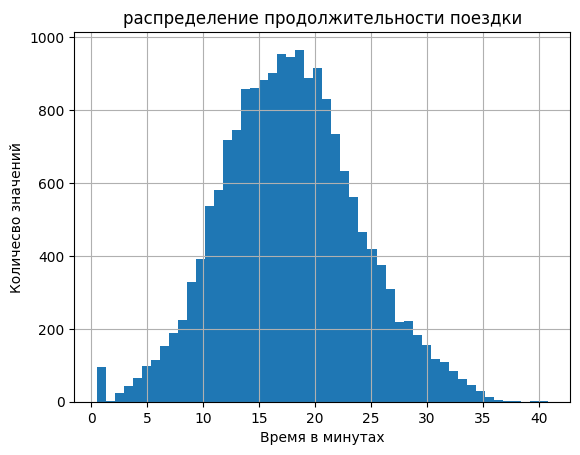

In [125]:
rd_df['duration'].hist(bins = 50)
plt.title('распределение продолжительности поездки')
plt.xlabel('Время в минутах')
plt.ylabel('Количесво значений')
plt.show()

In [126]:
durations = rd_df['duration'].to_numpy()

# Проверяем данные на нормальность распределения методом Монте-Карло
result = shapiro(durations)

# Выводим результаты проверки
print("Статистика Шапиро-Уилка:", result.statistic)
print("p-значение:", result.pvalue)

# Если p-значение меньше 0.05, то данные не являются нормально распределенными
if result.pvalue < 0.05:
    print("Данные не являются нормально распределенными.")
else:
    print("Данные являются нормально распределенными.")


mode = rd_df['duration'].mode()[0]
print(f'Мода набора данных равна {mode}')
print(f'Срденея длительность одной поездки составляет ', rd_df['duration'].mean().round(2), 'минут ')

Статистика Шапиро-Уилка: 0.9979504942893982
p-значение: 8.341549124341301e-15
Данные не являются нормально распределенными.
Мода набора данных равна 0.5
Срденея длительность одной поездки составляет  17.81 минут 


Вывод: средняя продолжительность поездки составила 17,81 минуты, а мода поездок составила 0,5 мин

## Шаг. Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм

In [127]:
data = rd_df.merge(user_df, on= 'user_id',  how ='left').merge(sub_df, on = 'subscription_type', how = 'left')
data.sample(5)

,user_id,distance,duration,date,moth_num,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6118,656,4402.85,12.78,2021-05-11,5,Галина,24,Тюмень,ultra,6,0,199
11166,1041,2604.67,17.16,2021-03-16,3,Рустам,21,Краснодар,free,8,50,0
17791,1516,202.55,5.01,2021-02-08,2,Давид,16,Краснодар,free,8,50,0
6091,653,2681.94,19.38,2021-02-26,2,Вадим,28,Пятигорск,ultra,6,0,199
5448,582,3183.79,18.59,2021-08-05,8,Анна,26,Москва,ultra,6,0,199


###  Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.

Соберем данные о тех кто не купил таблицу в отдельную таблицу.

In [128]:
data_sub = rd_df.merge(user_df, on= 'user_id',  how ='left')\
                .merge(sub_df[sub_df['subscription_type'] != 'free'], on = 'subscription_type', how = 'right')

data_sub.sample(5)

,user_id,distance,duration,date,moth_num,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
228,24,409.83,10.29,2021-04-04,4,Вероника,27,Тюмень,ultra,6,0,199
274,29,2890.23,17.39,2021-08-20,8,Денис,20,Омск,ultra,6,0,199
4829,520,3610.90,13.85,2021-10-31,10,Анжелика,30,Екатеринбург,ultra,6,0,199
5745,613,1099.74,11.44,2021-11-12,11,Людмила,34,Краснодар,ultra,6,0,199
1023,109,3488.45,25.31,2021-12-14,12,Марк,27,Краснодар,ultra,6,0,199


Соберем данные о тех кто купил таблицу в отдельную таблицу.

In [129]:
data_not_sub = rd_df.merge(user_df, on= 'user_id',  how ='left')\
                    .merge(sub_df[sub_df['subscription_type'] == 'free'], on = 'subscription_type', how = 'right')

data_not_sub.sample(5)

,user_id,distance,duration,date,moth_num,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
4431,1023,236.36,12.01,2021-09-28,9,Анатолий,25,Тюмень,free,8,50,0
10157,1432,2605.22,12.21,2021-08-23,8,Федор,23,Тюмень,free,8,50,0
3296,944,3946.24,27.52,2021-07-06,7,Маргарита,23,Пятигорск,free,8,50,0
10970,1492,4950.22,26.14,2021-12-22,12,Григорий,36,Краснодар,free,8,50,0
10201,1436,3237.77,19.19,2021-02-22,2,Антонина,28,Сочи,free,8,50,0


Вывод Сделаны три таблицы согласно условию. первая без параметров на всех данных. вторая для тех кто без подписки использует сервис, третья для тех кто приобрел подписку сервиса.

In [130]:
len(data)

18068

In [131]:
len(data_sub)

6500

In [132]:
len(data_not_sub)

11568

Вывод: мы получили 3 таблицы, проверили размерность, ничего не потеряли

### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

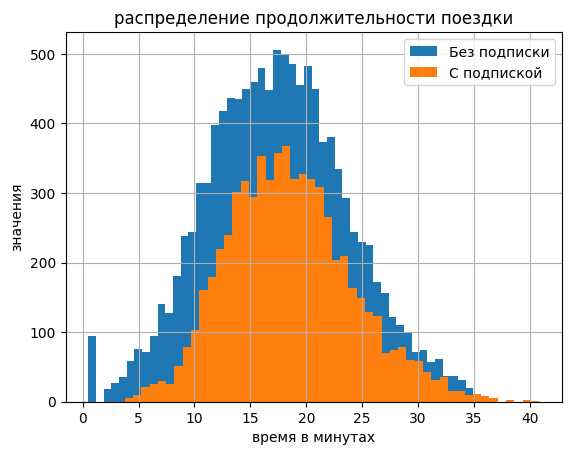

In [133]:
data.query('subscription_fee != 199')['duration'].hist(bins = 50)
data.query('subscription_fee == 199')['duration'].hist(bins = 50)

plt.legend (('Без подписки', 'С подпиской'), loc='upper right')
plt.title('распределение продолжительности поездки')
plt.xlabel('время в минутах')
plt.ylabel('значения')
plt.show()

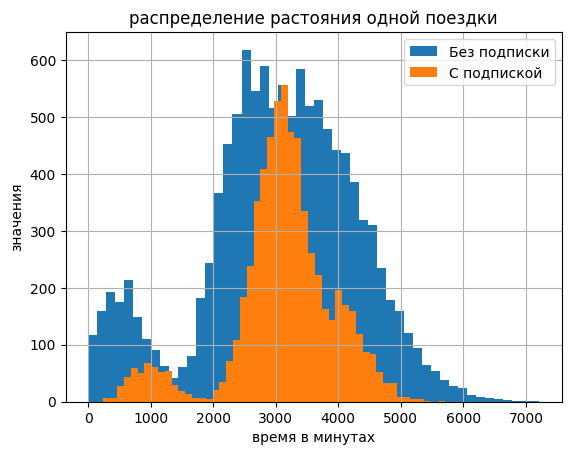

In [134]:
data.query('subscription_fee != 199')['distance'].hist(bins = 50)
data.query('subscription_fee == 199')['distance'].hist(bins = 50)

plt.legend (('Без подписки', 'С подпиской'), loc='upper right')
plt.title('распределение растояния одной поездки')
plt.xlabel('время в минутах')
plt.ylabel('значения')
plt.show()

Вывод: выше на графиках отображено распределение растояния которые проезжают за одну поездку с подпиской и без, так же отоюражена продож

## Шаг
. Подсчёт выручки

  ###  Создайте датафрейм с агрегированными данными
  о поездках на основе датафрейма с объединёнными данными, найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

#### Шаг. Подсчёт выручки

In [135]:
agg_table =data.copy()
agg_table['distance'] = np.ceil(agg_table['distance'])
agg_table['duration'] = np.ceil(agg_table['duration'])

agg_table1 = data.groupby(['user_id','moth_num','minute_price',\
                          'start_ride_price','subscription_fee']).agg({'distance': ['sum'],\
                                                                    'user_id' : ['count'],\
                                                                    'duration': ['sum']}).reset_index()
agg_table1.columns = ['user_id','moth_number','price','start_ride_price','subscription_fee', 'all_distance','count_trip','all_time']
agg_table1.sample(10)


,user_id,moth_number,price,start_ride_price,subscription_fee,all_distance,count_trip,all_time
1137,175,3,6,0,199,2473.48,1,22.60
4257,655,8,6,0,199,6801.53,2,43.96
5594,834,4,8,50,0,684.83,1,12.42
7861,1112,10,8,50,0,2741.08,1,20.71
2349,360,7,6,0,199,4164.95,1,19.61
1879,287,8,6,0,199,6312.17,2,29.40
6539,952,7,8,50,0,3459.22,1,26.21
7924,1119,11,8,50,0,4892.89,1,17.87
9226,1276,6,8,50,0,3264.11,1,19.06
9483,1309,4,8,50,0,14008.13,3,49.90


Вывод. создан новый столбце который содержит общее расстояние/время/количество поездок для каждого пользователя

###  В этот же датафрейм добавьте столбец
с помесячной выручкой, которую принёс каждый пользователь.

In [136]:
agg_table1['all_money_in_month'] = agg_table1['start_ride_price'] * agg_table1['count_trip']
agg_table1['all_money_in_month'] = agg_table1.apply(lambda x: 199 if x['all_money_in_month'] == 0 else x['all_money_in_month'], axis=1)
agg_table1['all_money_in_month'] +=   agg_table1['all_time'] * agg_table1['price']
agg_table1.sample(10)


,user_id,moth_number,price,start_ride_price,subscription_fee,all_distance,count_trip,all_time,all_money_in_month
4816,734,4,8,50,0,3019.04,1,18.93,201.44
8192,1153,3,8,50,0,1042.28,1,10.91,137.28
71,11,11,6,0,199,3273.22,1,19.11,313.66
7725,1096,2,8,50,0,2639.21,1,10.88,137.04
646,99,7,6,0,199,6930.76,2,40.46,441.76
5796,860,3,8,50,0,2275.12,2,23.81,290.48
5683,845,11,8,50,0,2853.23,1,11.15,139.20
1847,282,3,6,0,199,7092.47,2,24.52,346.12
5253,790,6,8,50,0,8209.80,2,40.56,424.48
8120,1144,7,8,50,0,10774.25,3,56.68,603.44


Вывод добавлен столбец с общей принесенным  доходом для каждого пользователя

## Шаг. Проверка гипотез

### Расчет гипотезы тратят ли пользователи с подпиской больше времени на поездки?
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим Гипотезу тратять ли пользователи с подпиской больше времени на поездки.

Нулевая гипотеза: средние значения трат пользователей из двух групп равны.

Альтернативная гипотеза: среднее значение трат пользователей с подпиской больше, чем среднее значение трат пользователей без подписки

In [137]:

# задаём уровень значимости
alpha = 0.01

# траты первой группы пользователей (с подпиской)
first_group_total = data_sub['duration']

# траты второй группы пользователей (без подпиской)
second_group_total = data_not_sub['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(first_group_total, second_group_total , alternative='greater',equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.6460360110885e-37
Отвергаем нулевую гипотезу


Вывод. Пользователи с подпиской тратят больше времени на поездки.

###  Оптимальное растояние ожидаемого износа
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.



Нулевая гипотеза: средняя продолжительности поездки до или равна 3130 .

Альтернативная гипотеза: Подписчики в среднем проезжают расстояние больше оптимального

In [138]:

t_stat, p_value = st.ttest_1samp(data_sub['distance'], 3130, alternative = 'greater')


print("t-статистика: ", t_stat)
print("p-значение: ", p_value)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

t-статистика:  -1.402118985377693
p-значение:  0.9195362605842414
Отвергаем нулевую гипотезу


### Проверьте гипотезу о выручке
Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Делем сводную таблицу с данными по месяцам и общим доходом от каждого вида пользователей.

Нулевая гипотеза: средняя выручка трат двух групп равна .

Альтернативная гипотеза: среднее значение трат пользователей без подписки больше, чем среднее значение трат пользователей с подпиской

In [139]:
table_sub = agg_table1.query('subscription_fee == 199')
table_sub = table_sub.groupby('moth_number').agg({'all_money_in_month': 'sum'})
table_sub

,all_money_in_month
moth_number,
1,142382.70
2,123150.84
3,140902.80
4,135704.78
5,147469.50
6,142181.30
7,141724.02
8,136918.38
9,127810.78


In [140]:
table_non_sub = agg_table1.query('subscription_fee != 199')
table_non_sub = table_non_sub.groupby('moth_number').agg({'all_money_in_month': 'sum'})
table_non_sub

,all_money_in_month
moth_number,
1,189906.80
2,162458.00
3,183367.28
4,181720.00
5,184063.76
6,188132.72
7,181348.48
8,183111.28
9,189697.76


In [141]:

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(table_sub['all_money_in_month'], table_non_sub['all_money_in_month'] , alternative='greater',equal_var=False)
alpha = 0.01


print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9999999999995646
Нет оснований отвергнуть нулевую гипотезу


Вывод в средней пользователи без подписки тратят больше денег в рамках сервиса. значение p-value: 0.9999999999995706 очень близко к 1, значит точно пользователи с подпиской тратят на порядок меньше

Ниже проведем рассчет без привязки к месяцам, просто с/без подписки

Нулевая гипотеза:  средняя выручка трат двух групп равна .
Альтернативная гипотеза: среднее значение трат пользователей c подпиской больше, чем среднее значение трат пользователей без подпиской

In [142]:
t = agg_table1.query('subscription_fee == 199')

In [143]:
f = agg_table1.query('subscription_fee != 199')

In [144]:
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(t['all_money_in_month'],f['all_money_in_month'], alternative='greater',equal_var=False)
alpha = 0.01


print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 3.086407271500339e-47
Отвергаем нулевую гипотезу


### Представьте такую ситуацию:
 техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Можно попробовать использовать парный t-тест.

Парный t-тест используется для сравнения средних значений двух зависимых выборок. В данном случае зависимыми выборками являются количество обращений в техподдержку до и после обновления серверов для каждого пользователя.

## Шаг. Распределения

###  Отделу маркетинга GoFast поставили задачу:
 нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество промокодов: 750


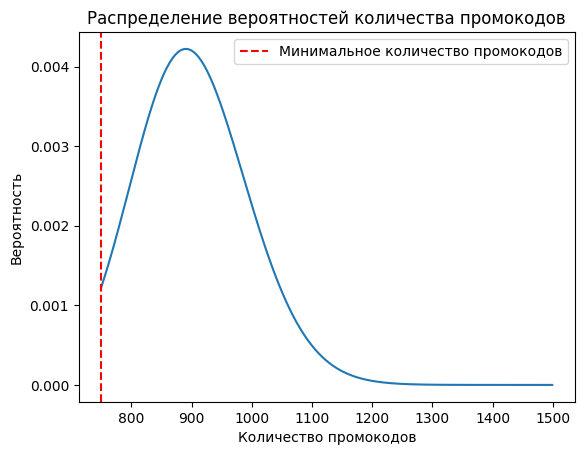

Минимальное количество промокодов: 750


In [145]:
# Вероятность продления 10%
p = 0.1

# продлить подписку должны мин 100 пользов.
n = 100

# значение не выполнить план
p_fail = 0.05

# Диапазон значений для количества промокодов
x = range(750, 1500)

# Вычисление минимального количества промокодов
min_promo = 0
for i in x:
    if st.nbinom.cdf(i, n, p) >= p_fail:
        min_promo = i
        break

print(f"Минимальное количество промокодов: {min_promo}")


# Вероятности для каждого значения в диапазоне
y = [st.nbinom.pmf(k, n, p) for k in x]

plt.plot(x, y)
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность')
plt.title('Распределение вероятностей количества промокодов')
plt.axvline(x=min_promo, color='r', linestyle='--', label='Минимальное количество промокодов')
plt.legend()
plt.show()

print(f"Минимальное количество промокодов: {min_promo}")

Вывод: нужно разосласть 750 прмокода чтобы выполнилось условие

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении.
 Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать
1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более
399,5 тыс. пользователей.

In [146]:
from math import sqrt
from scipy import stats as st


n = 1000000
p = 0.4


mu = n * p
sigma = sqrt(n * p * (1 - p))

# нормальное распределение
distr = st.norm(mu, sigma)

# считаем вероятность хвоста слева от 399500
result = distr.cdf(399500)
print(result)

0.15371708296369768


Вывод: примерно с 15% вероятностью промокоды откроют до 399500 пользователей

## Вывод

1. В первой части проекта была выполнена предобработка данных.
  - Были импортированы необходимые для работы библиотеки, загружены файлы и просмотрены по ним типы данных и то, что в них хранится.
  - Данные были приведены в верный тип, проверены на наличие пропусков и дубликатов, а также добавлен столбец с номером месяца.
2. В результате исследования в шаге три было выявлено:
  - получен коэффициент наклона линейно регрессии который равен -6.2619, данный коэф отрицальтельный, то есть каждый показатель каждого города уменьшается на приблизительно -6.3 пункта.
  При этом Дисперсия состаляет 214,9375 что говорит о том что данные сильно разбросаны. стандратное отклонение так же не большое из чего можно сделать вывод что в среднем от средедного данные отличаются очень сильно.
  При этом шанс того что случайное значение из набора данных будет принадлежать какому либо городу распредлеяется так:
      - Пятигорск 0.14
      - Екатеринбург 0.13
      - Ростов-на-Дону 0.13
      - Краснодар 0.13
      - Сочи 0.12
      - Омск 0.12
      - Тюмень 0.12
      - Москва 0.11
  - Количество пользователей с подпиской равно 699 человек, а без подписки — 835. Соотношение равно = 45.6% на  54.5%
  - чаще всего пользуются сервисом люди возврастом около 25 лет. далее в обе стороны снисходящая тенденция на спад.
  - Средняя дальность поездки составляет 3071м, при моде 3549.79
  - В данных есть выбросы если их не отсеивать то получаем следующую информацию. Средняя продолжительность поездки составила 17,81 минуты, а мода поездок составила 0,5мин.
то есть много "Отмен" в сразу после "старта" поездок

3. Были сделаны три таблицы согласно условию. Первая без параметров на всех данных, вторая для тех, кто без подписки использует сервис, третья для тех, кто приобрел подписку сервиса.
  -Пользователи без подписки совершают поездки большей длительности, чем пользователи не оформившие ее. Такое же соотношение сохраняется и для преодолеваемого расстояния.
4. Был создан новый столбец, который содержит общее расстояние/время/количество поездок для каждого пользователя. А также добавлен столбец с общей принесенным доходом для каждого пользователя
Проверены гипотезы:
  - Расчет гипотезы тратят ли пользователи с подпиской больше времени на поездки.
  - Расчет гипотезы попадания среднего диапазона данных в нужный коридор (до 3130)
  - Проверки гипотезы: была ли средняя выручка от пользователей с подпиской больше чем польлзователей без подписки.
  - Размышления о ситиации с обновлением сервера и кол-вом обращений
    - И получены следующие ответы:
      - Пользователи с подпиской тратят больше времени на поездки.
      - С вероятностью 50,69% среднее расстояние пользователей с подпиской не превышает расстояние в 3130 метров.
      - в средней пользователи без подписки тратят больше денег в рамках сервиса. Значение p-value: 0.9999999999995706 очень близко к 1, значит точно пользователи с подпиской тратят на порядок меньше
5. Распределение
  - Минимальное число промокодов которые нужно разослать чтобы сохранилось условия = 750
  - вероятность того что клиенты откроют до 399500 уведомлений = 15.37%

